In [28]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
plt.style.use("ggplot")

# Part A

In [2]:
def get_binary_array(n):
    return np.random.randint(2, size=100)

In [3]:
def bubble_sort(lst):
    for i in range(len(lst)):
        for j in range(len(lst)-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]

In [4]:
arr = get_binary_array(100)
bubble_sort(arr)

In [10]:
def find_the_floor(lst, left, right):
    if right >= left:
        middle = (right + left) // 2
        if lst[middle] == 1 and lst[middle-1] == 0:
            return middle
        elif lst[middle] == 1 and lst[middle-1] == 1:
            return find_the_floor(lst, left, middle-1)
        else:
            return find_the_floor(lst, middle+1, right)
    return -1

In [11]:
find_the_floor(arr, 0, len(arr)-1)

44

In [3]:
# replacing the "if" and "elif" statements

,Carrier,Day,DepTime,Dest,Origin,Weather,Delayed
0,OH,WED,1455,JFK,BWI,0,0
1,DH,WED,1640,JFK,DCA,0,0
2,DH,WED,1245,LGA,IAD,0,0
3,DH,WED,1709,LGA,IAD,0,0
4,DH,WED,1035,LGA,IAD,0,0
...,...,...,...,...,...,...,...
2196,RU,FRI,644,EWR,DCA,0,0
2197,RU,FRI,1653,EWR,IAD,0,0
2198,RU,FRI,1558,EWR,DCA,0,0
2199,RU,FRI,1403,EWR,DCA,0,0


# Part B

In [15]:
try:
    data = pd.read_csv("flights.csv")
except:
    print("Error")

In [16]:
len(data)

2201

In [17]:
data["Day"].value_counts().head(1)

THUR    391
Name: Day, dtype: int64

In [18]:
len(data[data["Weather"] == 2])

0

In [19]:
len(data[data["Origin"] == "JFK"])

0

In [20]:
temp = data[(data["Day"] == "FRI") & (data["Delayed"] == 1)]
temp.groupby("Carrier")["Day"].count()


Carrier
DH    13
DL     6
MQ     3
RU     2
Name: Day, dtype: int64

In [21]:
data.groupby("Day")["Delayed"].sum()

Day
FRI     24
MON     63
SAT     68
SUN     84
THUR    75
TUE     57
WED     57
Name: Delayed, dtype: int64

In [22]:
data.loc[(data["DepTime"] >= 0) & (data["DepTime"] <= 600), "DepInterval"] = "night"
data.loc[(data["DepTime"] >= 601) & (data["DepTime"] <= 1300), "DepInterval"] = "morning"
data.loc[(data["DepTime"] >= 1301) & (data["DepTime"] <= 1800), "DepInterval"] = "noon"
data.loc[(data["DepTime"] >= 1801) & (data["DepTime"] <= 2359), "DepInterval"] = "evening"

In [23]:
data.drop(columns=["DepTime"], inplace=True)

In [24]:
df = data[["Weather", "Delayed", "DepInterval"]].copy()

In [25]:
df = pd.get_dummies(df)

In [26]:
df

,Weather,Delayed,DepInterval_evening,DepInterval_morning,DepInterval_night,DepInterval_noon
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
2196,0,0,0,1,0,0
2197,0,0,0,0,0,1
2198,0,0,0,0,0,1
2199,0,0,0,0,0,1


In [27]:
df["DepInterval_evening"].mean()

0.18400726942298956

In [29]:
def get_kmeans_accuracy(data, top_k):
    sum_squared = []
    silhouette = []
    K = range(2, top_k + 1)
    for i in K:
        kmeans = KMeans(n_clusters = i, n_init="auto")
        kmeans.fit(data)
        sum_squared.append(kmeans.inertia_) # errors
        silhouette.append(silhouette_score(data, kmeans.labels_))
    return pd.DataFrame({
    "K": K,
    "SSE": sum_squared,
    "SIL": silhouette
  })

In [1]:
result = get_kmeans_accuracy(df, 10)
result.set_index("K", inplace=True)

NameError: name 'get_kmeans_accuracy' is not defined

<AxesSubplot:xlabel='K'>

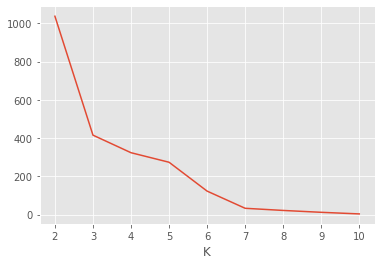

In [30]:
result = get_kmeans_accuracy(df, 10)
result.set_index("K", inplace=True)
result["SSE"].plot()

In [31]:
kmeans = KMeans(n_clusters = 3, n_init="auto")
kmeans.fit(df)

KMeans(n_clusters=3, n_init='auto')

In [32]:
silhouette_score(df, kmeans.labels_)

0.7777203744271004

In [33]:
df["Cluster"] = kmeans.labels_
df.groupby("Cluster").sum()

,Weather,Delayed,DepInterval_evening,DepInterval_morning,DepInterval_night,DepInterval_noon
Cluster,,,,,,
0,12,192,0.0,0.0,23.0,883.0
1,11,100,0.0,886.0,0.0,0.0
2,9,136,405.0,0.0,4.0,0.0


<AxesSubplot:xlabel='Cluster'>

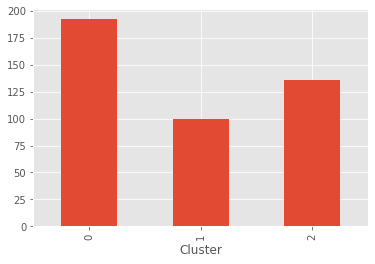

In [34]:
df.groupby("Cluster")["Delayed"].sum().plot(kind="bar")